In [1]:
import cv2;
import numpy as np;
from matplotlib import pyplot as plt
import math

import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv2.__version__))

Python version 3.11.8 (main, Feb 12 2024, 14:50:05) [GCC 13.2.1 20230801] / OpenCV version 4.9.0 


In [2]:
drive_path = ".."

#### Ejercicio 1: Lectura, visualización y escritura de imágenes
1. Realizar la carga y visualización de diferentes imágenes.
2. Mostrar en pantalla información sobre las imágenes.
3. Investigar los formatos de imágenes y cómo leer y escribir un valor puntual en una imágen.
4. Utilizar el pasaje de parámetros para especificar la imagen a cargar.
5. Definir y recortar una subimagen de una imagen.
6. Investigar y realizar una función que permita mostrar varias imágenes en una sola ventana (un solo plot en este caso).
7. Dibujar sobre la imagen lineas, círculos y rectángulos (mover la posicion de alguno con sliders).


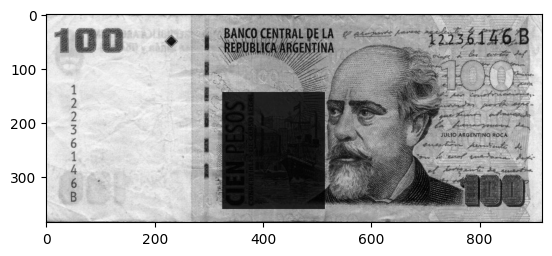

Alto, ancho y n_canales = (384, 916, 3)
valor medio 149.901, mínimo 0, máximo 255


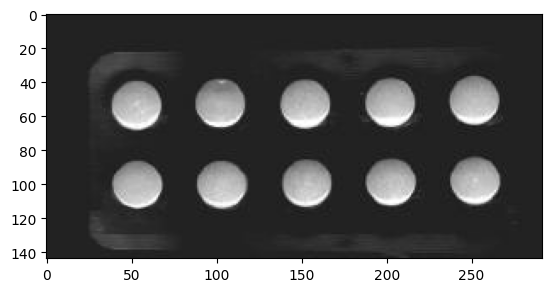

Alto, ancho y n_canales = (144, 292, 3)
valor medio 58.601, mínimo 17, máximo 255


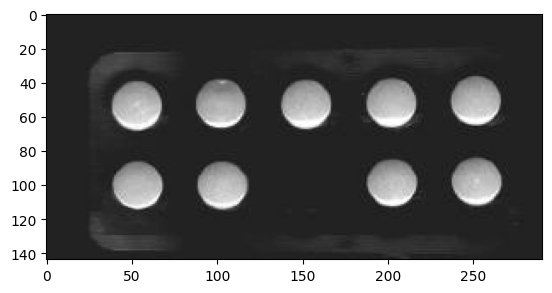

Alto, ancho y n_canales = (144, 291, 3)
valor medio 56.510, mínimo 17, máximo 255


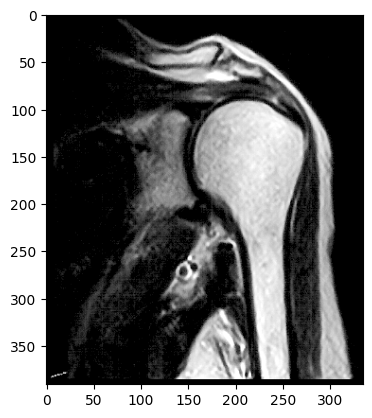

Alto, ancho y n_canales = (391, 335, 3)
valor medio 64.509, mínimo 0, máximo 255


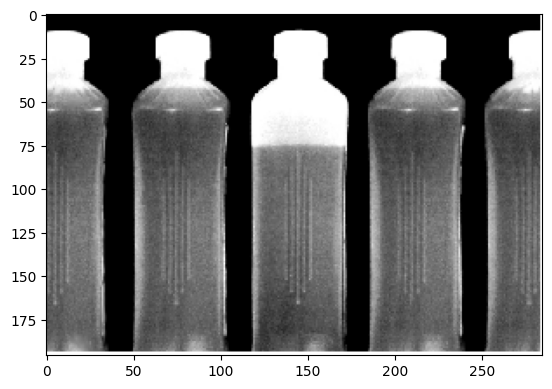

Alto, ancho y n_canales = (196, 285, 3)
valor medio 92.357, mínimo 0, máximo 255


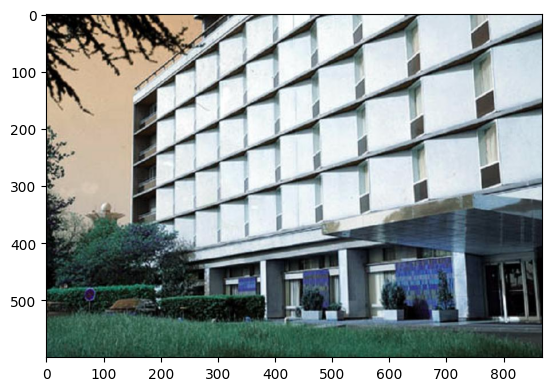

Alto, ancho y n_canales = (600, 868, 3)
valor medio 140.074, mínimo 0, máximo 255


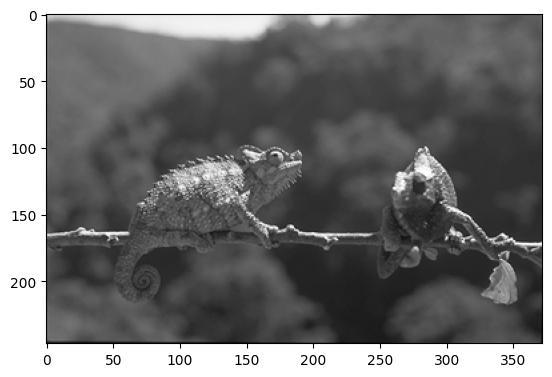

Alto, ancho y n_canales = (247, 372, 3)
valor medio 82.977, mínimo 14, máximo 255


In [3]:
# 1,2 y 4
def mostrar_imagen(img_path):
  img = cv2.imread(drive_path+img_path)
  plt.figure()
  plt.imshow(img)
  plt.show()
  print("Alto, ancho y n_canales = %s" %str(img.shape))
  print("valor medio %.3f, mínimo %d, máximo %d" %(np.mean(img),
                                                 np.min(img),
                                                 np.max(img)))

img_list = ["/images/billete.jpg",
            "/images/blister_completo.jpg",
            "/images/blister_incompleto.jpg",
            "/images/bone.tif",
            "/images/botellas.tif",
            "/images/building.jpg",
            "/images/camaleon.tif",
            ]

for n in range(0,len(img_list)):
  mostrar_imagen(img_list[n])


<class 'numpy.ndarray'>


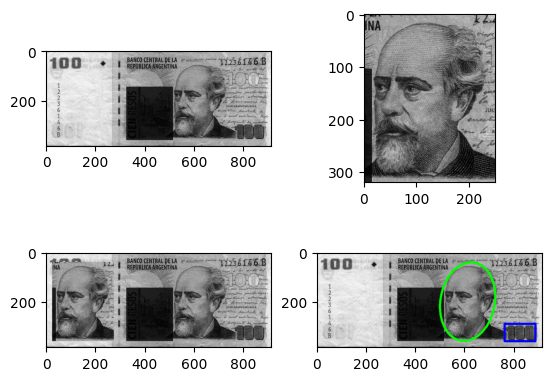

In [4]:
# 3, 5 y 7

# Para leer y escribir un valor puntual en una imagen solo hay que acceder y
# cambiar su valor en la estructura de datos que la contiene, en este caso, un
# numpy.ndarray

img3 = cv2.imread(drive_path + img_list[0])
print(type(img3))

# Leer solo una seccion de la imagen
img3_region = img3[40:360,500:750]

# Escribir en la imagen (en la copia de la imagen cargada en memoria)
img3_modificada = img3.copy()
img3_modificada[40:360,25:275] = img3_region

img3_dibujada = img3.copy()
cv2.rectangle(img3_dibujada,(760,290),(885,360),(0,0,255),8)
cv2.ellipse(img3_dibujada,(610,200),(110,160),10,0,360,(0,255,0),8)

plt.figure()
plt.subplot(2,2,1)
plt.imshow(img3)

plt.subplot(2,2,2)
plt.imshow(img3_region)

plt.subplot(2,2,3)
plt.imshow(img3_modificada)

plt.subplot(2,2,4)
plt.imshow(img3_dibujada)

plt.show()


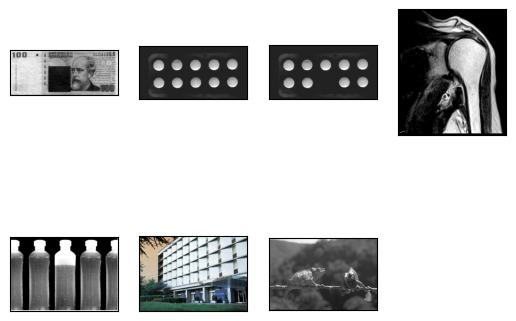

In [5]:
# 6
import math
def mostrar_imagen_subplot(img_list):

  row = 2
  col = math.floor(len(img_list)/2)
  if (col%2 != 0):
    col = col + 1

  for n in range(0,len(img_list)):
    img = cv2.imread(drive_path+img_list[n])
    plt.subplot(row,col,n+1)
    plt.imshow(img)

    # Desactivar los ejes x e y
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


  plt.show()

mostrar_imagen_subplot(img_list)



#### Ejercicio 2: Información de intensidad
1. Informar los valores de intensidad de puntos particulares de la imagen.
2. Obtener y graficar los valores de intensidad (*perfil de intensidad*) sobre una determinada fila o columna.
3. Graficar el *perfil de intensidad* para un segmento de interés cualquiera.



In [6]:
# 1

# Cargar imagen img y obtener su valor accediendo al contenido del numpy.ndarray
# haciendo img[y,x], el valor que se obtiene es el valor de intensidad.

In [7]:
# 2 y 3

# Dejar graficar los valores de la imagen en una direccion dejando fija la otra
# plt.plot(img[:, 25]) -> Perfil de intensidad a lo largo del eje y con x=25.

#### Ejercicio 3: Aplicación

Hay una version mas larga de la imagen de las botellas para probar (descomentar)

(196, 285)
Cantidad contada de botellas: 5
Botellas vacias: [[3, 118, 174, 146.0]]


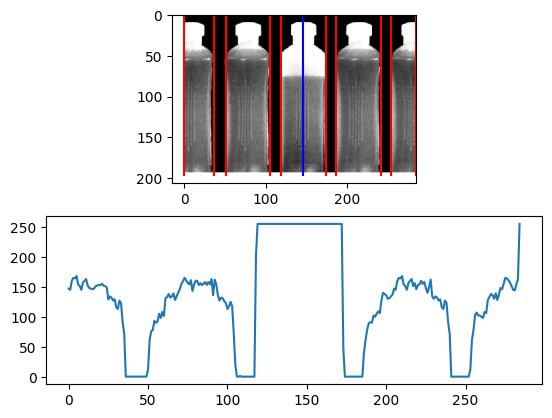

In [8]:
# Cantidad de botellas real: 5, (y 17 en la imagen mas larga)

img_path = drive_path + "/images/botellas.tif"
#img_path = drive_path + "/images/botellas_larga.tif"

botellas = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

# Se toma la linea y=50 como referencia para determinar si una botella esta
# llena o vacia
y = 50

count = 0 # cantidad total de botellas
count_wrong = 0 # cantidad total de botellas mal llenadas

botellas_vacias = []
lista_botellas = []

print(botellas.shape)

# Variables que van a ir guardando la posicion inicial y final una botella
x_inicio = -1
x_fin= -1

for x in range(1,botellas.shape[1]):

    # Caso en que el pixel es el primero de una botella
    if (botellas[y,x] > 20 and botellas[y,x-1] <= 20):
        x_inicio = x

    # Caso en que el pixel es el ultimo de una botella o
    # la imagen termina y todavia hay un pixel que no es negro
    if ((botellas[y,x] <= 20 and botellas[y,x-1] > 20) or \
        (x == botellas.shape[1]-1 and botellas[y,x] > 20)):

        x_fin = x
        count += 1
        lista_botellas.append([count,x_inicio,x_fin])

        # Las botellas con intensidad mayor a 200 son botellas mal llenadas
        if (botellas[y,x-2] > 200):
            botellas_vacias.append([count,x_inicio,x_fin,math.floor(x_inicio+x_fin)/2])

print("Cantidad contada de botellas: %d"%count)
print("Botellas vacias: %s"%botellas_vacias)
# print("Botellas y su posicion: %s"%lista_botellas)

plt.figure()
plt.subplot(2,1,1)
plt.imshow(botellas,cmap="gray")

# Plot de lineas que marcan inicio y fin de cada botella
for i in range(0,len(lista_botellas)):
    for j in range(1,3):
        if j != -1:
            plt.plot([lista_botellas[i][j],lista_botellas[i][j]],[0,botellas.shape[0]],'r')

# Plot de lineas que marcan el centro de cada botella mal llenada
for i in range(0,len(botellas_vacias)):
    plt.plot([botellas_vacias[i][3],botellas_vacias[i][3]],[0,botellas.shape[0]],'b')

# for i in range(0,len(botellas_vacias)):
#     for j in range(1,3):
#         if j != -1:
#             plt.plot([botellas_vacias[i][j],botellas_vacias[i][j]],[0,botellas.shape[0]],'b')



plt.subplot(2,1,2)
plt.plot(botellas[50,:])

plt.show()

In [9]:
## TODO: informar el porcentaje de llenado de una botella mal llenada